In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
spam_dataset = pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [4]:
def remove_puncation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned


def tokenize(text):
    clean_text = text.lower()
    tokenized_text = nltk.word_tokenize(clean_text)
    return tokenized_text


stopwords = nltk.corpus.stopwords.words("english")
def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords


stemmer = nltk.PorterStemmer()
def stemming(text):
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words


lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word) for word in text]
    return lemmatized_words



spam_dataset['Cleaned_Text'] = spam_dataset['Text'].apply(lambda x: remove_puncation(x))
spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(lambda x: tokenize(x))
spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
spam_dataset['Stemmed_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: stemming(x))
spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: lemmatizing(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Stemmed_Text,Lemmatized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."


In [25]:
X = spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x))
y = spam_dataset['Spam']                                         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

count = CountVectorizer()
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

clf_count = RandomForestClassifier(random_state=0)
clf_count.fit(X_train_count, y_train)

y_pred_count = clf_count.predict(X_test_count)
acc_count = accuracy_score(y_test, y_pred_count)


tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf_tfidf = RandomForestClassifier(random_state=0)
clf_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f'Accuracy with Count Vectorizer: {acc_count}\nAccuracy with TF-IDF Vectorizer: {acc_tfidf}') 

Accuracy with Count Vectorizer: 0.9700956937799043
Accuracy with TF-IDF Vectorizer: 0.9754784688995215


In [26]:
feature_importances = clf_tfidf.feature_importances_
feature_names = tfidf.get_feature_names_out()

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

selected_features = feature_importance_df.loc[feature_importance_df['Importance'] > 0.001, 'Feature'].tolist()

selected_feature_indices = [tfidf.vocabulary_[feature] for feature in selected_features]

X_train_selected = X_train_tfidf[:, selected_feature_indices]
X_test_selected = X_test_tfidf[:, selected_feature_indices]

In [27]:
clf_v2 = RandomForestClassifier(random_state=0)
clf_v2.fit(X_train_selected, y_train)

y_pred_selected = clf_v2.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

print(f'Accuracy with selected features: {acc_selected}')

Accuracy with selected features: 0.9688995215311005


In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

clf_grid = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print(f'Best params: {best_params}')

Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [29]:
clf_final = grid_search.best_estimator_

y_pred_final = clf_final.predict(X_test_selected)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f'Accuracy after hyperparameter tuning: {accuracy_final}')

Accuracy after hyperparameter tuning: 0.9491626794258373


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1448
           1       0.99      0.62      0.77       224

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.94      1672

AUC: 0.9730755475532754


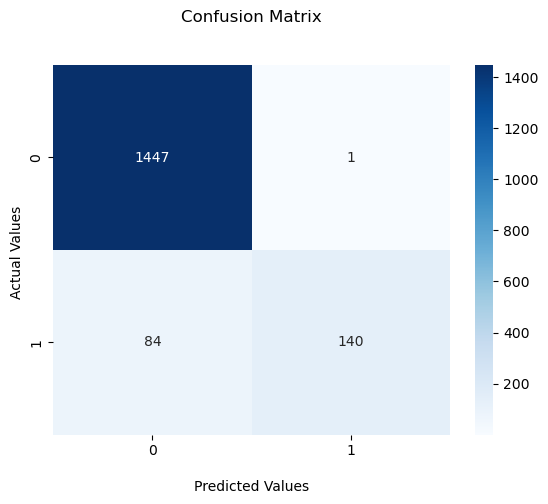

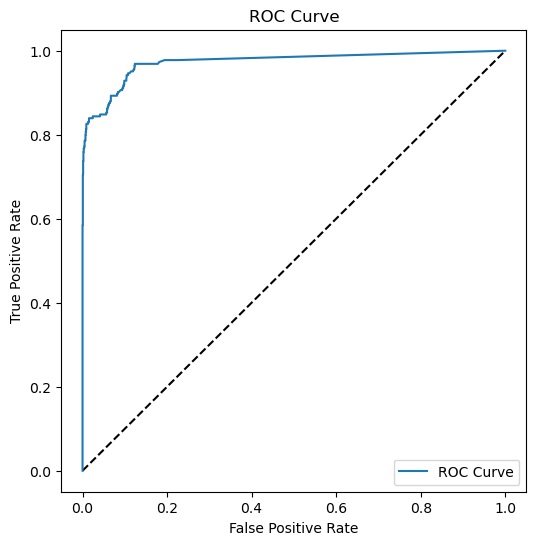

In [30]:
def calculate_metrics(model, X_checked, y_checked):

    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)

    print(classification_report(y_checked, predictions))
    print(f'AUC: {roc_auc_score(y_checked, predictions_proba[:,1])}')

    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_checked, predictions_proba[:, 1])

    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


calculate_metrics(clf_final, X_test_selected, y_test)